<a href="https://colab.research.google.com/github/polarbeariceskating/AI2023/blob/main/Machine_Learning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#unduh dataset dari kaggle
#memerlukan kaggle.json untuk mendapatkan akses ke kaggle
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
#unduh dataset
!kaggle datasets download -d akshaydattatraykhare/diabetes-dataset

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 19.6MB/s]


In [47]:
#ekstrasi dataset yang sudah diunduh
!unzip diabetes-dataset.zip

Archive:  diabetes-dataset.zip
replace diabetes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: diabetes.csv            


In [84]:
# import packages
import numpy as np
import pandas as pd

# read dataset
data = pd.read_csv('diabetes.csv')
print("Data Asli:")
print(data)

print("Data dengan Nilai yang Hilang")
print("=====================================================================")
# code agar data ada yang hilang
random_mask = np.random.rand(data.shape[0], data.shape[1]) < 0.3
data_hilang = data.copy()  # Buat salinan dataset untuk data dengan nilai yang hilang
data_hilang[random_mask] = np.nan
print(data_hilang)

# set threshold
print("Data Setelah Di Cleaning")
print("=====================================================================")
threshold = 0.9
data_cleaning = data_hilang.dropna(thresh=int(data_hilang.shape[1] * threshold))
print(data_cleaning)

print("Data dengan Nilai yang Hilang")
print("=====================================================================")
print(data_hilang)
print("=====================================================================")
print("Data Setelah Di Median")
# filling missing values with medians of the columns
data_medians = data_hilang.fillna(data.median())
print(data_medians)
print("=====================================================================")
print("Data Setelah Di Mean")
# filling missing values with medians of the columns
data_mean = data_hilang.fillna(data.mean())
print(data_mean)

print("Data dengan Nilai yang Hilang")
print("=====================================================================")
print(data_hilang)
print("Data Setelah maximum occurred value pada kolom Glucose")
print("=====================================================================")
# filling missing values with medians of the columns
data_maximum_occurred_value = data_hilang.fillna({'Glucose': data_hilang['Glucose'].mode().iloc[0]})
print(data_maximum_occurred_value )




Data Asli:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1       

In [104]:
# Min-Max Normalization
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#baca dataset
data = pd.read_csv('diabetes.csv')
print("Data Asli:")
print("=====================================================================")
print(data)

# create scaler method
scaler = MinMaxScaler(feature_range=(0,1))

# fit and transform the data
scaled_data = scaler.fit_transform(data)
print("Data Scaled:")
print("=====================================================================")
print(scaled_data)


Data Asli:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1       

In [72]:
# Standardization
from sklearn.preprocessing import StandardScaler
import numpy as np

# 4 samples/observations and 2 variables/features
data = np.array([[4, 1], [11, 1], [10, 4], [1, 11]])

# create scaler method
scaler = StandardScaler()

# fit and transform the data
scaled_data = scaler.fit_transform(data)

print(scaled_data)
print("=====================================================================")
print(scaled_data.mean(axis=0))
print("=====================================================================")
print(scaled_data.std(axis=0))

[[-0.60192927 -0.79558708]
 [ 1.08347268 -0.79558708]
 [ 0.84270097 -0.06119901]
 [-1.32424438  1.65237317]]
[0. 0.]
[1. 1.]


In [91]:
# Label Encoding
#unduh dataset
!kaggle datasets download -d mirichoi0218/insurance

  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 10.3MB/s]


In [92]:
#ekstrasi dataset yang sudah diunduh
!unzip  insurance.zip

Archive:  insurance.zip
  inflating: insurance.csv           


In [98]:
# import packages
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# baca data
data = pd.read_csv('insurance.csv')
print("Data Asli:")
print("=====================================================================")
print(data)

# Mengecek nama kolom
print(data.columns)
data = pd.get_dummies(data, columns = ['sex','smoker'])
print("Data Encoding:")
print("=====================================================================")
print(data)

Data Asli:
      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
Data Encoding:
      age     bmi  children     region      charges  sex_

In [102]:
# One-hot-encoding
# import packages
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# baca data
data = pd.read_csv('insurance.csv')
print("Data Asli:")
print("=====================================================================")
print(data)

# Pilih kolom-kolom yang ingin Anda one-hot encode
categorical_columns = ['sex', 'smoker']

# Terapkan Label Encoding pada kolom-kolom kategori
label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Terapkan One-Hot Encoding pada kolom-kolom yang telah Anda label encode
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
onehot_encoded = onehot_encoder.fit_transform(data[categorical_columns])

# Gabungkan hasil One-Hot Encoding dengan DataFrame asli
data_encoded = pd.concat([data.drop(columns=categorical_columns), pd.DataFrame(onehot_encoded)], axis=1)

# Tampilkan hasil
print("Data Setelah One-Hot Encoding:")
print("=====================================================================")
print(data_encoded)

Data Asli:
      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]
Data Setelah One-Hot Encoding:
      age     bmi  children     region      charges    0    1
0      19  27.900         0  southwest  16884.92400  0.0  1.0
1    

In [109]:
#Univariate Selection
# Load packages
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Load iris data
iris_dataset = load_iris()
print(iris_dataset.DESCR)
print("=====================================================================")
print("=====================================================================")

# Create features and target
X = iris_dataset.data
y = iris_dataset.target

# Convert to categorical data by converting data to integers
X = X.astype(int)

# Two features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k = 2)
X_kbest_features = chi2_features.fit_transform(X, y)

# Reduced features
print('Original feature number:', X.shape[1]) #awalnya dataset iris memiliki 4 fitur numerik
print('Reduced feature number:', X_kbest_features.shape[1]) #menunjukkan bahwa setelah menjalankan seleksi fitur, hanya 2 fitur yang dipilih berdasarkan kriteria yang ditentukan

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

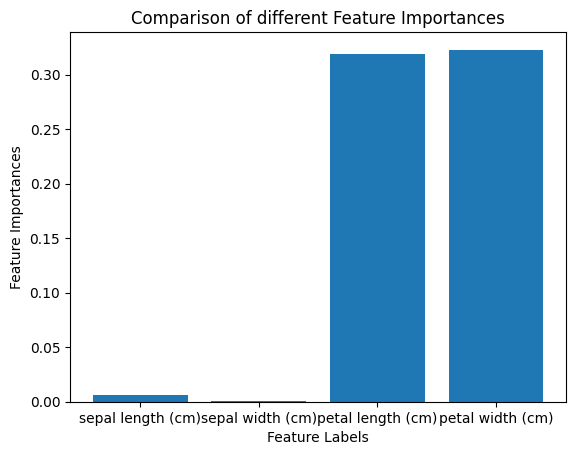

In [77]:
#Feature Importance
# Load libraries
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

# Load iris data
iris_dataset = load_iris()

# Create features and target
X = iris_dataset.data
y = iris_dataset.target

# Convert to categorical data by converting data to integers
X = X.astype(int)

 # Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 2)

# Training the model
extra_tree_forest.fit(X, y)

# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in
                                        extra_tree_forest.estimators_],
                                        axis = 0)

# Plotting a Bar Graph to compare the models
plt.bar(iris_dataset.feature_names, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

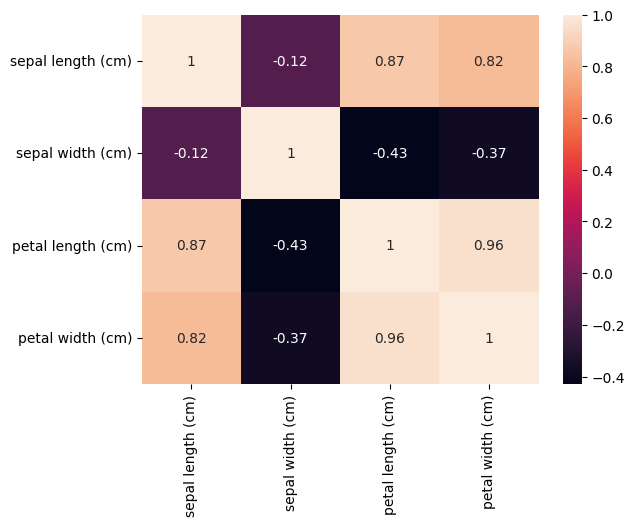

In [110]:
# Correlation Matrix Heatmap
#Load libraries
#from sklearn.datasets import load_boston (fungsi load_boston sudah di hapus)
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

# Load iris data
iris_dataset = load_iris()

# create a daframe for boston data
iris = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)

# Convert to categorical data by converting data to integers
#X = X.astype(int)

#ploting the heatmap for correlation
ax = sns.heatmap(iris.corr().round(2), annot=True)

